In [2]:
import pandas as pd 
import numpy as nm 
from sklearn.model_selection import train_test_split as ttp 
from sklearn.metrics import classification_report 
import re 
import string
import matplotlib.pyplot as plt

In [3]:
data_true=pd.read_csv("True.csv")
data_fake=pd.read_csv("Fake.csv")

In [4]:
data_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [5]:
data_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
data_true.shape, data_fake.shape

((21417, 4), (23481, 4))

In [7]:
data_true["class"]=1
data_fake["class"]=0

In [8]:
data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis=0, inplace=True)
    
data_fake_manual_testing = data_fake.tail(10)
for i in range(21416,21406,-1):
    data_fake.drop([i],axis=0, inplace=True)

In [9]:
data_manual_testing = pd.concat([data_fake_manual_testing, data_true_manual_testing], axis=0)
data_manual_testing.to_csv("manual_testing.csv ")

In [10]:
data_merge = pd.concat([data_fake,data_true],axis=0)
data_merge.head(15)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4449
politics            6841
politicsNews       11272
worldnews          10135
Name: text, dtype: int64


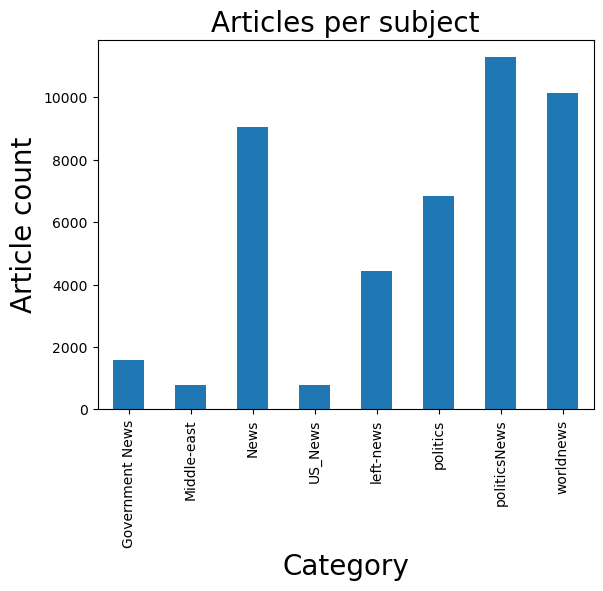

In [11]:
print(data_merge.groupby(['subject'])['text'].count())
data_merge.groupby(['subject'])['text'].count().plot(kind="bar")
plt.title("Articles per subject",size=20)
plt.xlabel("Category",size=20)
plt.ylabel("Article count",size=20)
plt.show()

class
0    23471
1    21407
Name: text, dtype: int64
0 = Fake news
1 = True news


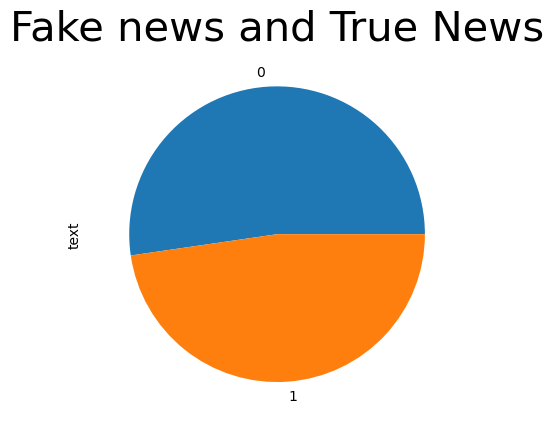

In [12]:
print(data_merge.groupby(['class'])['text'].count())
print("0 = Fake news\n1 = True news")
data_merge.groupby(['class'])['text'].count().plot(kind="pie")
plt.title("Fake news and True News",size=30)
plt.show()

In [13]:
data = data_merge.drop(["title","subject","date"], axis=1)
data.head(20)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [14]:
data=data.sample(frac=1)
data.head(10)

,text,class
1276,LONDON (Reuters) - A top U.S. government legal...,1
20147,LONDON (Reuters) - Prime Minister Theresa May ...,1
13991,Has the entire world gone mad with political c...,0
355,You know how Donald Trump stubbornly refuses t...,0
19471,When an audience member asks Kellyanne Conway ...,0
11781,OTTAWA (Reuters) - Canadian Prime Minister Jus...,1
8482,The following timeline charts the origin and s...,1
7577,A former employee of Donald Trump s Trump Univ...,0
11677,WASHINGTON (Reuters) - The U.S. Treasury Depar...,1
9694,BUENOS AIRES (Reuters) - An Argentine TV stati...,1


In [15]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [16]:
def filtering(data):
    text=data.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\s+|www\.S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [17]:
data["text"]= data["text"].apply(filtering)
data.head(5)

,text,class
1276,london reuters a top u s government legal...,1
20147,london reuters prime minister theresa may ...,1
13991,has the entire world gone mad with political c...,0
355,you know how donald trump stubbornly refuses t...,0
19471,when an audience member asks kellyanne conway ...,0


In [18]:
x=data["text"]
y=data["class"]

In [19]:

x_train,x_test,y_train,y_test=ttp(x,y,test_size=0.25,random_state=0)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vector = TfidfVectorizer() 
xv_train=vector.fit_transform(x_train)
xv_test=vector.transform(x_test)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
LR=LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [24]:
LR.score(xv_test,y_test).round(2)

0.99

In [25]:
pred_LR= LR.predict(xv_test)

In [26]:
print(classification_report(y_test,pred_LR))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5829
           1       0.99      0.99      0.99      5391

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



[[5755   74]
 [  68 5323]]


<AxesSubplot:>

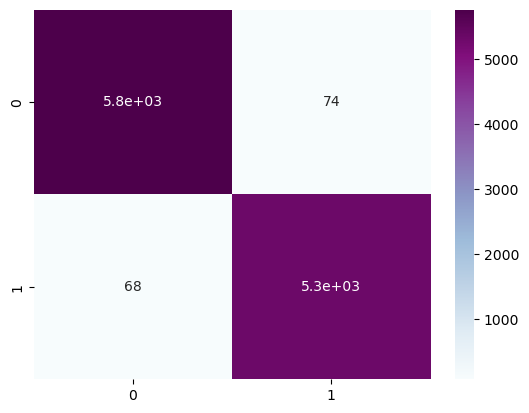

In [27]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,pred_LR)  
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="BuPu",annot=True)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
DT = DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [30]:
DT.score(xv_test,y_test).round(2)

1.0

In [31]:
pred_DT = DT.predict(xv_test)

In [32]:
print(classification_report(y_test,pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5829
           1       1.00      0.99      1.00      5391

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



[[5811   18]
 [  29 5362]]


<AxesSubplot:>

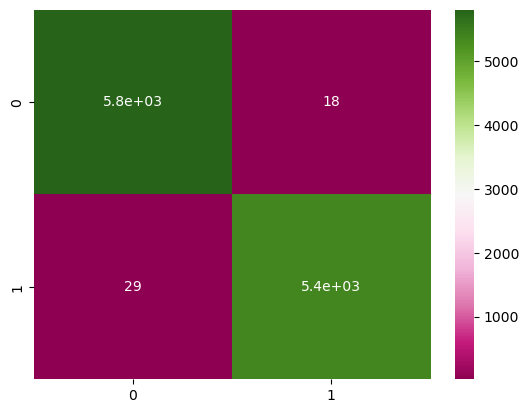

In [33]:
cm= confusion_matrix(y_test,pred_DT)  
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="PiYG",annot=True)

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train,y_train)

GradientBoostingClassifier(random_state=0)

In [36]:
GBC.score(xv_test,y_test)

0.9953654188948307

In [37]:
pred_GBC = GBC.predict(xv_test)

In [38]:
print(classification_report(y_test,pred_GBC))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5829
           1       0.99      1.00      1.00      5391

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



[[5794   35]
 [  17 5374]]


<AxesSubplot:>

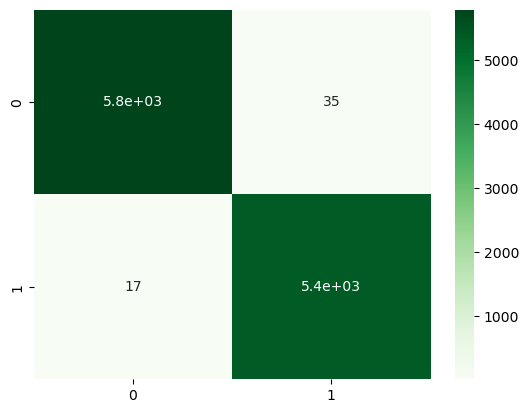

In [39]:
cm= confusion_matrix(y_test,pred_GBC)  
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="Greens",annot=True)

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [42]:
RFC.score(xv_test,y_test)

0.9894830659536542

In [43]:
pred_RFC = RFC.predict(xv_test)

In [44]:
print(classification_report(y_test,pred_RFC))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5829
           1       0.99      0.99      0.99      5391

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



[[5778   51]
 [  67 5324]]


<AxesSubplot:>

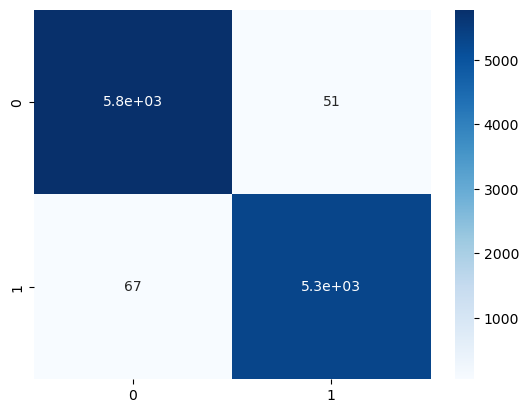

In [45]:
cm= confusion_matrix(y_test,pred_RFC)  
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="Blues",annot=True)

In [46]:
def output_lable(n):
    if n == 0:
        return "FAKE News"
    elif n == 1:
        return "TRUE News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(filtering) 
    new_x_test = new_def_test["text"]
    new_xv_test = vector.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0]))) 
     

In [ ]:
news = str(input())
manual_testing(news)

In [ ]:
news = str(input())
manual_testing(news)